<a href="https://colab.research.google.com/github/jackarl/programacion_analitica/blob/main/Conceptos_estadisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicaciones de conceptos estadısticos en conjunto de datos**

1	Operaciones basicas
Objetivo: Crear y manipular arrays.

1.	Crea un array de 10 elementos con valores entre 1 y 10.
2.	Calcula la media, mediana, y desviacion estandar de los valores.
3.	Multiplica cada valor por 2.


In [2]:
import numpy as np
import pandas as pd
tenarr = np.arange(1,11)
tenarr = pd.DataFrame(tenarr)
tenarr

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [3]:
tenarr.describe()

,0
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [4]:
tenarr.multiply(2)

,0
0,2
1,4
2,6
3,8
4,10
5,12
6,14
7,16
8,18
9,20


2.	**Operaciones con DataFrames**

1.	Crea un DataFrame con 3 columnas (A, B, C) y 5 filas con numeros aleatorios enteros.
2.	Renombra las columnas a Col1, Col2, Col3.
3.	Añade una nueva columna que sea la suma de las columnas Col1 y Col2.
4.	Elimina todas las filas donde el valor de Col3 sea menor que 10.


In [5]:
df = pd.DataFrame(np.random.randint(0,100,size=(5, 3)), columns=list('ABC'))
df

,A,B,C
0,27,95,24
1,88,29,6
2,94,40,30
3,26,93,45
4,63,45,83


In [6]:
df = df.rename(columns={
    'A': 'col1',
    'B': 'col2',
    'C': 'col3'})
df

,col1,col2,col3
0,27,95,24
1,88,29,6
2,94,40,30
3,26,93,45
4,63,45,83


In [7]:
df["col4"] = df["col1"] + df["col2"]
df

,col1,col2,col3,col4
0,27,95,24,122
1,88,29,6,117
2,94,40,30,134
3,26,93,45,119
4,63,45,83,108


In [8]:
df = df.drop(df[df.col3 < 10].index)
df

,col1,col2,col3,col4
0,27,95,24,122
2,94,40,30,134
3,26,93,45,119
4,63,45,83,108


**3.	Estadıstica descriptiva**

1.	Crea un DataFrame con 100 valores aleatorios entre 0 y 50.
2.	Calcula la media, mediana y moda de los valores.
3.	Encuentra el valor m´ınimo y el valor m´aximo del DataFrame.


In [9]:
df = pd.DataFrame(np.random.randint(0,50,size=(100, 1)), columns=list('A'))
df

,A
0,35
1,13
2,49
3,2
4,9
...,...
95,19
96,21
97,25
98,41


In [10]:
df.describe()

,A
count,100.00000
mean,23.97000
std,14.39799
min,0.00000
25%,10.00000
50%,26.50000
75%,35.00000
max,49.00000


**4.	Analisis de series temporales**

1.	Crea un DataFrame con una columna de fechas (usa pd.date_range() para generar las fechas).
2.	Genera 100 valores aleatorios asociados a estas fechas.
3.	Calcula la media movil de los valores con una ventana de 5 dıas


In [11]:
# 1

usa = pd.date_range(start='1/1/2018', end='12/31/2018')
usa = pd.DataFrame(usa)
# 2

from random import randint
df = pd.DataFrame(np.random.randint(0,100,size=(100, 1)), columns=list('A'))
print(usa)
df.head()

#3

df["Media_movil"] = df.rolling(window=5).mean()
df.head()

             0
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
..         ...
360 2018-12-27
361 2018-12-28
362 2018-12-29
363 2018-12-30
364 2018-12-31

[365 rows x 1 columns]


,A,Media_movil
0,34,NaN
1,79,NaN
2,42,NaN
3,89,NaN
4,15,51.8


**5.	Grafico de Lıneas**

1. Crea una serie de datos aleatorios (entre 0 y 100) de tamanño 50.
2. Usa Matplotlib para graficar los datos en un grafico de lıneas.
3. Añade tıtulo, etiquetas a los ejes y una leyenda.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
graf = pd.DataFrame(np.random.randint(0,100,size=(50, 1)), columns=list('A'))

Text(0, 0.5, 'eje Y')

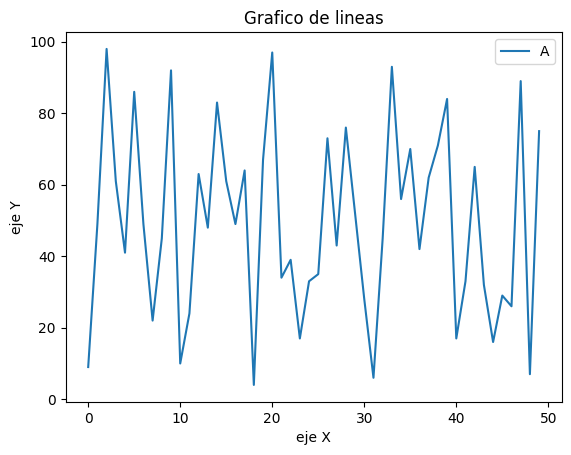

In [13]:
sns.lineplot(data=graf)
plt.title('Grafico de lineas')
plt.xlabel('eje X')
plt.ylabel('eje Y')

**6.	Grafico de Barras**

1.	Carga el dataset tips de Seaborn.
2.	Realiza un grafico de barras que muestre el total de las cuentas (total_bill) agrupadas por dıa.
3.	Añade etiquetas a los ejes y un tıtulo.


In [14]:
from seaborn import load_dataset
tips = load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


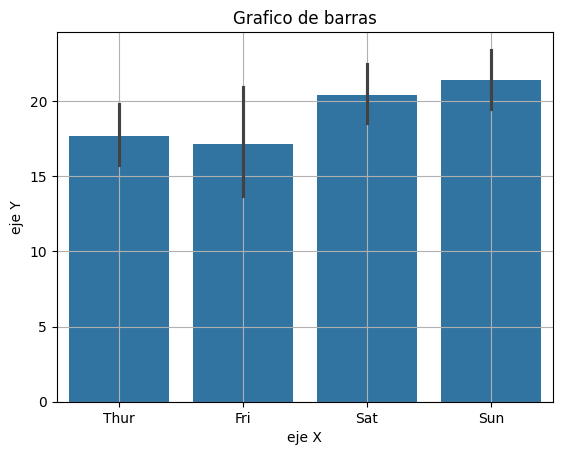

In [15]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title('Grafico de barras')
plt.xlabel('eje X')
plt.ylabel('eje Y')
plt.grid(True)

7.	Histograma

1.	Genera 1000 numeros aleatorios con distribucion normal (media = 0, desviacion estandar = 1).
2.	Crea un histograma para visualizar la distribucion.
3.	Ajusta el numero de bins del histograma para que la visualizacion sea clara.


<Axes: ylabel='Count'>

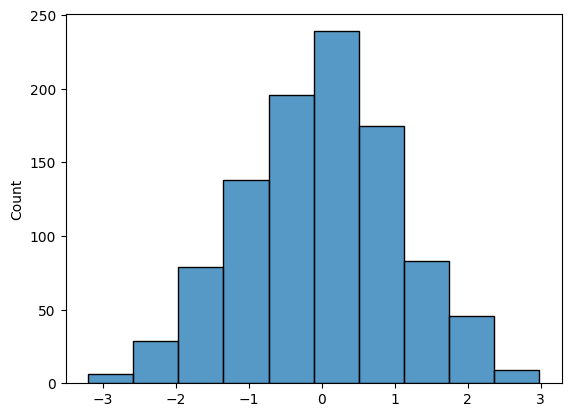

In [16]:
ale = np.random.normal(0, 1, 1000)
sns.histplot(ale, bins=10)

<Axes: ylabel='Count'>

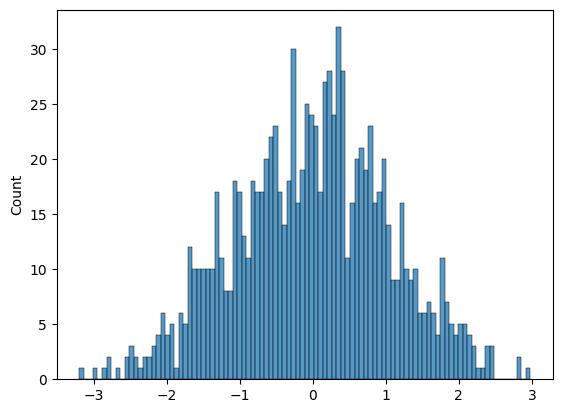

In [17]:
# 3
sns.histplot(ale, bins=100)

**8.	Scatter Plot**

1.	Usa el dataset iris de Seaborn.
2.	Crea un grafico de dispersion (scatter plot) para visualizar la relacion entre el ancho del sepalo (sepal_width) y la longitud del sepalo (sepal_length).
3.	Añade colores diferentes segun la especie de flor.


In [18]:
sep = load_dataset("iris")
sep.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='sepal_length'>

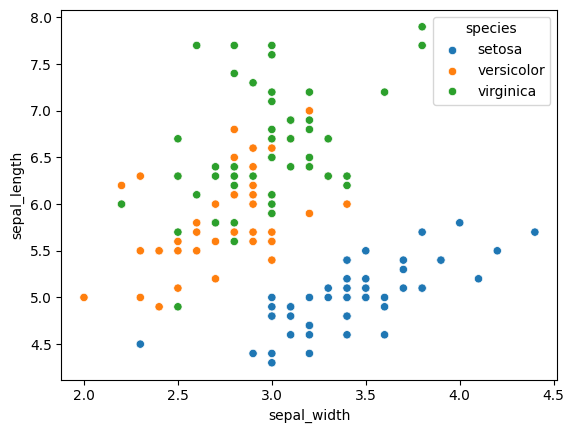

In [19]:
sns.scatterplot(x="sepal_width", y="sepal_length", hue="species", data=sep)

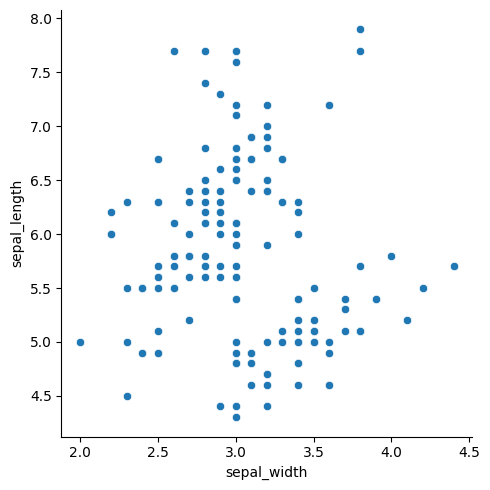

In [20]:
sns.relplot(data=sep, x="sepal_width", y="sepal_length")

**9.	Heatmap**

1.	Usa el dataset iris de Seaborn.
2.	Calcula la matriz de correlacion de las variables.
3.	Crea un heatmap para visualizar la matriz de correlaci´on.


In [22]:
iris = load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


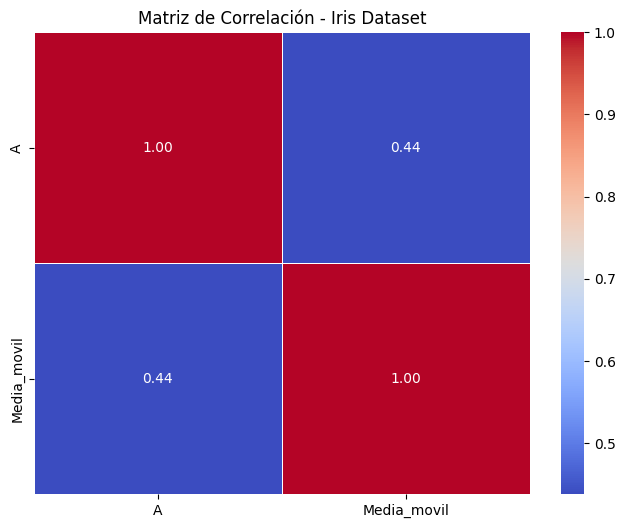


Matriz de correlación numérica:
                    A  Media_movil
A            1.000000     0.438059
Media_movil  0.438059     1.000000


In [25]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación - Iris Dataset')
plt.show()

print("\nMatriz de correlación numérica:")
print(corr_matrix)

**10.	Grafico de Lınea con Media Movil**

1.	Genera una serie temporal de 100 dıas con valores aleatorios.
2.	Calcula la media movil de los ultimos 10 dıas y graficala junto a la serie original.
3.	Usa diferentes colores para la serie original y la media movil.


In [26]:
Serie = pd.DataFrame(np.random.randint(0,100,size=(100, 1)), columns=list('A'))
Serie.head()

,A
0,5
1,87
2,31
3,85
4,38


In [27]:
Media_movil = Serie.rolling(window=7).mean()
Media_movil.head()

,A
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


**11.	Datos Temporales con Analisis Estadıstico**

1.	Genera una serie temporal de 200 dıas con valores aleatorios.
2.	Calcula la media y la desviacion estandar de la serie temporal.
3.	Visualiza la serie junto con las bandas de desviacion estandar (es decir, la media ± 1 desviacion estandar).


In [29]:
temp = pd.DataFrame(np.random.randint(0,100,size=(200, 1)), columns=list('A'))
temp.head()

,A
0,54
1,5
2,57
3,47
4,8


In [30]:
temp.mean()

,0
A,49.2


In [31]:
temp.std()

,0
A,29.82377


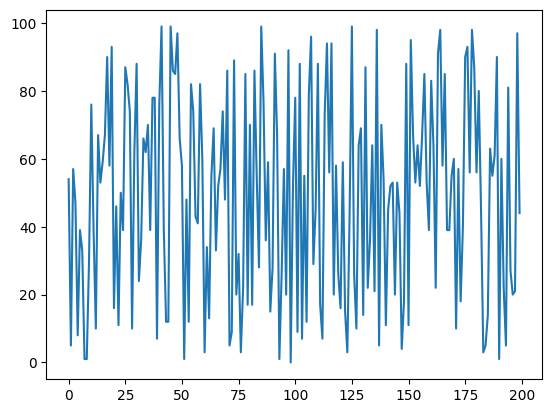

In [32]:
plt.plot(temp, label='Serie Temporal')